In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
data_count = 100

In [3]:
x_tensor = torch.linspace(-5, 5, data_count)
x_variable = Variable(x_tensor)
x_np = x_tensor.numpy()

In [4]:
y_np = 2*x_np

In [5]:
noise = np.random.normal(0, 0.1, data_count)

In [6]:
y_np = y_np + noise

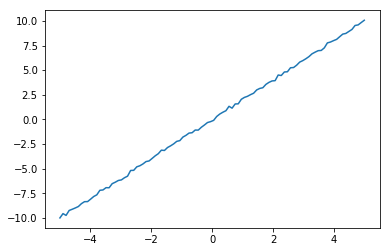

In [7]:
plt.plot(x_np, y_np)

In [8]:
x_np.shape
y_np.shape
noise.shape

(100,)

In [9]:
w = 1.0

In [10]:
def forward(x):
    return x*w

In [11]:
def loss(x, y):
    y_pred = forward(y)
    return (y_pred-y)*(y_pred-y)

In [12]:
def gradient(x, y):
    # 优化的loss对w的梯度，使用链式法则进行求解
    return 2*(x*w-y)*x

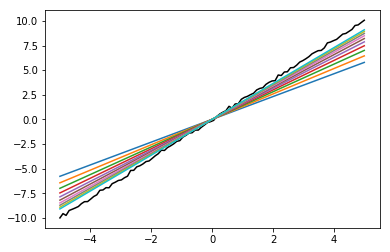

In [13]:
# 可以看出最后拟合的线越来越接近真实值，loss也越来越小，为了可视化w的学习过程，这里设置学习率eta为较小的值0.0001
y_enlarge = 1.0
eta = 0.0001
# eta = 0.01
plt.plot(x_np, y_enlarge*y_np, color='black')
for epoch in range(10):
    for x_data, y_data in zip(x_np, y_np):
        grad = gradient(x_data, y_data)
        w = w-eta*grad
        loss_val = loss(x_data, y_data)
    plt.plot(x_np, y_enlarge*forward(x_np))
#     print('loss_val:', loss_val)
#     print('w:', w)